In [1]:
using JLD
using PGFPlots
using Interact
include("finite_horizon.jl")

solve (generic function with 1 method)

In [2]:
policies = jldopen("param_sweep_modified.jld", "r") do file
    read(file, "policies")
end
probs_set = Set([k[3] for k in keys(policies)])
probs_array = [a for a in probs_set];

In [145]:
policies_corr = jldopen("param_sweep_test.jld", "r") do file
    read(file, "policies")
end
probs_set_corr = Set([k[3] for k in keys(policies_corr)])
probs_array_corr = [a for a in probs_set_corr];

In [90]:
function plot_policies(rho::Float64, gamma::Float64, probs::Vector{Float64})
    # Extract policies
    πs = policies[[rho,gamma,probs]]

    # Create figure
    g = GroupPlot(3, 3, groupStyle = "horizontal sep = 1.5cm, vertical sep = 1.5cm")

    # Plot probability distribution
    x = [-1, 0, 1, 2]
    p = Plots.Linear(x, probs, style="ybar,black,fill=blue,opacity=0.7", mark="none")
    a = Axis(p, xlabel=L"\Delta \beta", ylabel=L"P(\Delta \beta)", style="xtick={-1,0,1,2}, bar width=27pt",ymin=0)
    push!(g, a)

    # Plot policies
    for i = 1:5
        colormap = ColorMaps.Named("Jet")
        p = Plots.Image((x,y)->πs[i, round(UInt32, x), round(UInt32, y)], (1,50), (1,50), colormap = colormap, zmin=-1, zmax=maximum(πs))
        a = Axis(p, xlabel=L"\alpha", ylabel=L"\beta", title="t = $(i)")
        if i != 5
            a.plots[1].colorbar = false
        end
        push!(g, a)
    end
    g
end

plot_policies (generic function with 2 methods)

In [115]:
function plot_policies(rho::Float64, gamma::Float64, probs::Vector{Float64}, var::Float64, mu::Float64)
    # Extract policies
    πs = policies_corr[[rho,gamma,probs, var, mu]]

    # Create figure
    g = GroupPlot(3, 3, groupStyle = "horizontal sep = 1.5cm, vertical sep = 1.5cm")

    # Plot probability distribution
    x = [-1, 0, 1, 2]
    p = Plots.Linear(x, probs, style="ybar,black,fill=blue,opacity=0.7", mark="none")
    a = Axis(p, xlabel=L"\Delta \beta", ylabel=L"P(\Delta \beta)", style="xtick={-1,0,1,2}, bar width=27pt",ymin=0)
    push!(g, a)

    # Plot policies
    for i = 1:5
        colormap = ColorMaps.Named("Jet")
        p = Plots.Image((x,y)->πs[i, round(UInt32, x), round(UInt32, y)], (1,50), (1,50), colormap = colormap, zmin=-1, zmax=maximum(πs))
        a = Axis(p, xlabel=L"\alpha", ylabel=L"\beta", title="t = $(i)")
        if i != 5
            a.plots[1].colorbar = false
        end
        push!(g, a)
    end
    g
end

plot_policies (generic function with 2 methods)

## How do different parameters affect the policies?

Interact.Options{:SelectionSlider,Float64}(1: "input" = 0.5 Float64 ,"γ",0.5,"0.5",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9…),Dict(0.6=>"0.6",0.3=>"0.3",0.7=>"0.7",0.0=>"0.0",0.2=>"0.2",0.9=>"0.9",0.8=>"0.8",0.5=>"0.5",0.1=>"0.1",0.4=>"0.4"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(3: "input-2" = 0.84 Float64 ,"ρ",0.84,"0.84",Interact.OptionDict(DataStructures.OrderedDict("0.74"=>0.74,"0.79"=>0.79,"0.84"=>0.84,"0.89"=>0.89,"0.94"=>0.94,"0.99"=>0.99),Dict(0.94=>"0.94",0.74=>"0.74",0.79=>"0.79",0.84=>"0.84",0.89=>"0.89",0.99=>"0.99")),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Int64}(5: "input-3" = 7 Int64 ,"i",7,"7",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(2=>"2",11=>"11",7=>"7",9=>"9",10=>"10",8=>"8",6=>"6",4=>"4",3=>"3",5=>"5"…)),Any[],Any[],true,"horizontal")

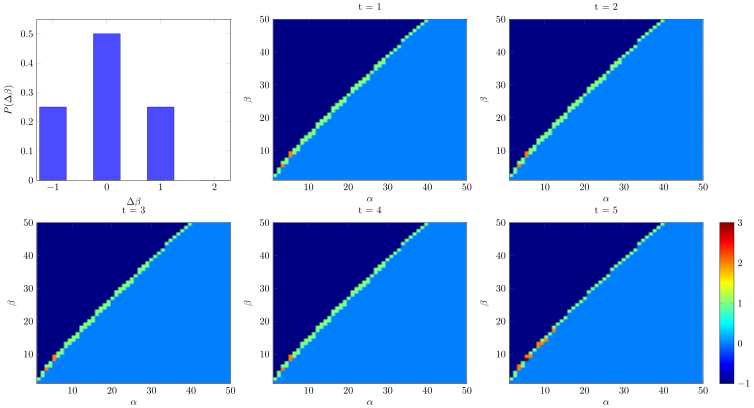

In [6]:
@manipulate for γ=0.0:0.1:1.0, ρ=0.74:0.05:0.99, i = 1:length(probs_array)
    plot_policies(ρ, γ, probs_array[i])
end

In [7]:
function maximum_lambda(rho::Float64, gamma::Float64, probs::Vector{Float64})
    πs = policies[[rho,gamma,probs]]

    # Create figure
    g = GroupPlot(3, 3, groupStyle = "horizontal sep = 1.75cm, vertical sep = 1.5cm")

    # Plot probability distribution
    x = [-1, 0, 1, 2]
    p = Plots.Linear(x, probs, style="ybar,black,fill=blue,opacity=0.7", mark="none")
    a = Axis(p, xlabel=L"\Delta \beta", ylabel=L"P(\Delta \beta)", style="xtick={-1,0,1,2}, bar width=27pt",ymin=0)
    push!(g, a)

    # Find MLE of lambda
    released = 1.0*(πs .!= 0.0)
    lambda = zeros(50, 50)
    for i = 1:50
        for j = 1:50
            lambda[i, j] = i/j
        end
    end

    # Plot lambda_max
    for i = 1:5
        # Indicator for whether vehicles were released
        βs = collect(1:50)
        λ_max = squeeze(maximum(released[i, :, :].*lambda, 1), 1)
        λ_min = squeeze(minimum((500*released[i, :, :]+1.0).*lambda, 1), 1)

        p1 = Plots.Linear(βs, λ_max)
        p2 = Plots.Linear(βs, λ_min)
        a = Axis(p1, xlabel=L"\beta", ylabel=L"$\hat \lambda_{\max}$", title="t = $(i)", xmin=0)
        push!(g, a)
    end
    g
end

maximum_lambda (generic function with 1 method)

## What is the maximum value of $\mathbb{E}[\lambda]$ for which we would still release any vehicles?

Interact.Options{:SelectionSlider,Float64}(9: "input-4" = 0.5 Float64 ,"γ",0.5,"0.5",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9…),Dict(0.6=>"0.6",0.3=>"0.3",0.7=>"0.7",0.0=>"0.0",0.2=>"0.2",0.9=>"0.9",0.8=>"0.8",0.5=>"0.5",0.1=>"0.1",0.4=>"0.4"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(11: "input-5" = 0.84 Float64 ,"ρ",0.84,"0.84",Interact.OptionDict(DataStructures.OrderedDict("0.74"=>0.74,"0.79"=>0.79,"0.84"=>0.84,"0.89"=>0.89,"0.94"=>0.94,"0.99"=>0.99),Dict(0.94=>"0.94",0.74=>"0.74",0.79=>"0.79",0.84=>"0.84",0.89=>"0.89",0.99=>"0.99")),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Int64}(13: "input-6" = 7 Int64 ,"i",7,"7",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(2=>"2",11=>"11",7=>"7",9=>"9",10=>"10",8=>"8",6=>"6",4=>"4",3=>"3",5=>"5"…)),Any[],Any[],true,"horizontal")

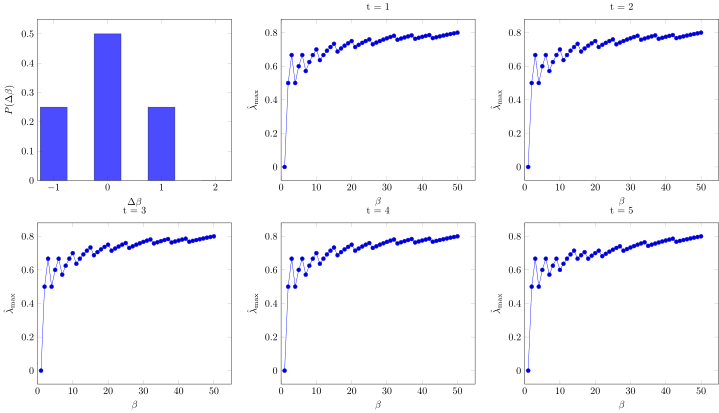

In [8]:
@manipulate for γ=0.0:0.1:1.0, ρ=0.74:0.05:0.99, i = 1:length(probs_array)
    maximum_lambda(ρ, γ, probs_array[i])
end

In [9]:
rhos = zeros(3, 50)
C_refs = [0.9, 0.95, 0.99]
for i = 1:3
    def = ProblemDefinition(H = 5, rho=0.9, C_ref=C_refs[i], gamma = 0.9, β_distribution = [0.0, 1.0, 0.0, 0.0])
    for β = 1:50
        rho_min = 1.0
        α = β + 1
        s = State(α, β)
        for n = 1:1000
            pn = P_n(s, n, def, 0)
            rho = 1/(β/n/α*pn + 1)
            rho_min = min(rho_min, rho)
        end
        rhos[i, β] = rho_min
    end
end

## What conditions are necessary for release when $\frac{\alpha}{\beta} > \lambda_{\text{ref}}$?

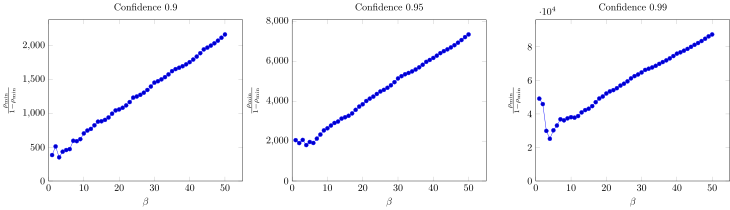

In [10]:
# Create figure
g = GroupPlot(3, 1, groupStyle = "horizontal sep = 1.75cm, vertical sep = 1.5cm")
for i = 1:3
    p = Plots.Linear(collect(1:50), rhos[i, :]./(1.0 - rhos[i, :]))
    a = Axis(p, xlabel=L"\beta", ylabel=L"$\frac{\rho_{\min}}{1 - \rho_{\min}}$", title="Confidence $(C_refs[i])", xmin=0, ymin=0)
    push!(g, a)
end
g

In [11]:
function n_vs_lambda(rho::Float64, gamma::Float64, probs::Vector{Float64})
    πs = policies[[rho,gamma,probs]]

    # Create figure
    g = GroupPlot(3, 3, groupStyle = "horizontal sep = 1.75cm, vertical sep = 1.75cm")

    # Plot probability distribution
    x = [-1, 0, 1, 2]
    p = Plots.Linear(x, probs, style="ybar,black,fill=blue,opacity=0.7", mark="none")
    a = Axis(p, xlabel=L"\Delta \beta", ylabel=L"P(\Delta \beta)", style="xtick={-1,0,1,2}, bar width=27pt",ymin=0)
    push!(g, a)

    # Find MLE of lambda
    released = 1.0*(πs .!= 0.0)
    lambda = zeros(50, 50)
    for i = 1:50
        for j = 1:50
            lambda[i, j] = i/j
        end
    end

    # Plot n as a function of lambda estimate
    for i = 1:5
        # Initialize and populate arrays
        λs = Array(Float64, 1)
        ns = Array(Float64, 1)
        βs = Array(Float64, 1)
        for j = 1:50
            for k = 1:50
                if πs[i, j, k] > 0
                    push!(λs, lambda[j, k])
                    push!(ns, πs[i, j, k])
                    push!(βs, k)
                end
            end
        end
        
        p1 = Plots.Scatter(λs[2:end], ns[2:end], βs[2:end])
        if i == 5
            a = Axis(p1, xlabel=L"\hat \lambda", ylabel=L"n", title="t = $(i)", xmin=0, ymin=0, colorbar=true)
        else
            a = Axis(p1, xlabel=L"\hat \lambda", ylabel=L"n", title="t = $(i)", xmin=0, ymin=0)
        end
        push!(g, a)
    end
    g
end

n_vs_lambda (generic function with 1 method)

## How many vehicles should be released for different values of $\mathbb{E}[\lambda]$?

Interact.Options{:SelectionSlider,Float64}(17: "input-7" = 0.5 Float64 ,"γ",0.5,"0.5",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9…),Dict(0.6=>"0.6",0.3=>"0.3",0.7=>"0.7",0.0=>"0.0",0.2=>"0.2",0.9=>"0.9",0.8=>"0.8",0.5=>"0.5",0.1=>"0.1",0.4=>"0.4"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(19: "input-8" = 0.84 Float64 ,"ρ",0.84,"0.84",Interact.OptionDict(DataStructures.OrderedDict("0.74"=>0.74,"0.79"=>0.79,"0.84"=>0.84,"0.89"=>0.89,"0.94"=>0.94,"0.99"=>0.99),Dict(0.94=>"0.94",0.74=>"0.74",0.79=>"0.79",0.84=>"0.84",0.89=>"0.89",0.99=>"0.99")),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Int64}(21: "input-9" = 7 Int64 ,"i",7,"7",Interact.OptionDict(DataStructures.OrderedDict("1"=>1,"2"=>2,"3"=>3,"4"=>4,"5"=>5,"6"=>6,"7"=>7,"8"=>8,"9"=>9,"10"=>10…),Dict(2=>"2",11=>"11",7=>"7",9=>"9",10=>"10",8=>"8",6=>"6",4=>"4",3=>"3",5=>"5"…)),Any[],Any[],true,"horizontal")

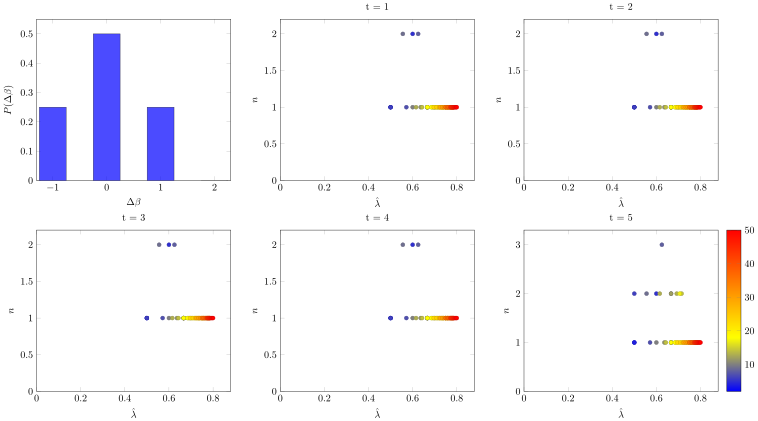

In [12]:
@manipulate for γ=0.0:0.1:1.0, ρ=0.74:0.05:0.99, i = 1:length(probs_array)
    n_vs_lambda(ρ, γ, probs_array[i])
end

Interact.Options{:SelectionSlider,Float64}(503: "input-211" = 1.0 Float64 ,"γ",1.0,"1.0",Interact.OptionDict(DataStructures.OrderedDict("1.0"=>1.0),Dict(1.0=>"1.0")),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(505: "input-212" = 0.95 Float64 ,"ρ",0.95,"0.95",Interact.OptionDict(DataStructures.OrderedDict("0.95"=>0.95),Dict(0.95=>"0.95")),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Int64}(507: "input-213" = 1 Int64 ,"i",1,"1",Interact.OptionDict(DataStructures.OrderedDict("1"=>1),Dict(1=>"1")),Any[],Any[],true,"horizontal")

Interact.Options{:ToggleButtons,Float64}(509: "input-214" = 0.1 Float64 ,"var",0.1,"0.1",Interact.OptionDict(DataStructures.OrderedDict("0.1"=>0.1),Dict(0.1=>"0.1")),Any[],Any[],true,"horizontal")

Interact.Options{:ToggleButtons,Float64}(511: "input-215" = 0.0 Float64 ,"μ",0.0,"0.0",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.5"=>0.5),Dict(0.0=>"0.0",0.5=>"0.5")),Any[],Any[],true,"horizontal")

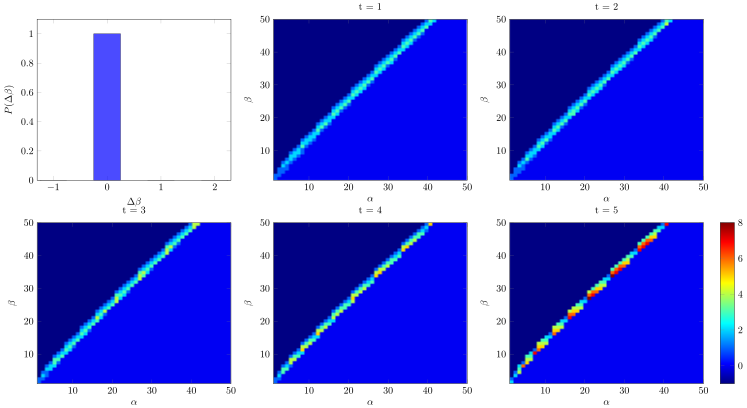

In [146]:
# probs_array_corr = [[0.0, 1.0, 0.0, 0.0], [0.0, 0.25, 0.25, 0.5]]
@manipulate for γ=0.5:0.25:1.0, ρ=0.75:0.1:0.95, i = 1:length(probs_array_corr), var=[0.1, 1.0], μ = [0.0, 0.5, 1.0] 
    plot_policies(ρ, γ, probs_array_corr[i], var, μ)
end

# probs_array_corr = [[0.0, 1.0, 0.0, 0.0]]
# @manipulate for γ=1.0:0.25:1.0, ρ=0.95:0.1:0.95, i = 1:length(probs_array_corr), var=[0.1], μ = [0.0, 0.5] 
#     plot_policies(ρ, γ, probs_array_corr[i], var, μ)
# end

In [93]:
function experience_for_termination(mu::Float64, var::Float64, conf::Float64=0.95)
    # Create problem definition
    def = ProblemDefinition(H = 5, rho=0.95, C_ref=0.95, gamma = 1.0, β_distribution = zeros(4), μ = mu, var = var)
    
    # Loop through alpha and find minimum beta that provides terminal state
    min_beta = zeros(50)
    Δβ = mu/var
    Δα = mu*Δβ
    for α = 1:50
        β = 1
        while true
            s = State(α + Δα, β + Δβ)
            if is_terminal(s, def)
                min_beta[α] = β
                break
            end
            β += 1
        end
    end
    p = Plots.Linear(collect(1:50), min_beta)
    a = Axis(p, xlabel=L"\alpha", ylabel=L"\beta_{\min}", ymin=0, ymax=50, xmin=0, xmax=50)
    min_beta
end

experience_for_termination (generic function with 2 methods)

Interact.Options{:SelectionSlider,Float64}(85: "input-35" = 1.0 Float64 ,"μ",1.0,"1.0",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.1"=>0.1,"0.2"=>0.2,"0.3"=>0.3,"0.4"=>0.4,"0.5"=>0.5,"0.6"=>0.6,"0.7"=>0.7,"0.8"=>0.8,"0.9"=>0.9…),Dict(0.6=>"0.6",0.3=>"0.3",1.2=>"1.2",2.0=>"2.0",1.5=>"1.5",0.7=>"0.7",0.0=>"0.0",1.4=>"1.4",0.2=>"0.2",0.9=>"0.9"…)),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(87: "input-36" = 0.601 Float64 ,"var",0.601,"0.601",Interact.OptionDict(DataStructures.OrderedDict("0.001"=>0.001,"0.301"=>0.301,"0.601"=>0.601,"0.9009999999999999"=>0.901,"1.2009999999999998"=>1.201),Dict(0.601=>"0.601",0.901=>"0.9009999999999999",0.001=>"0.001",0.301=>"0.301",1.201=>"1.2009999999999998")),Any[],Any[],true,"horizontal")

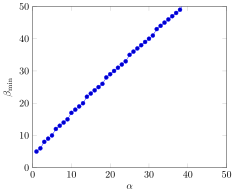

In [65]:
@manipulate for μ = 0.0:0.1:2.0, var=0.001:0.3:1.21
    experience_for_termination(μ, var)
end

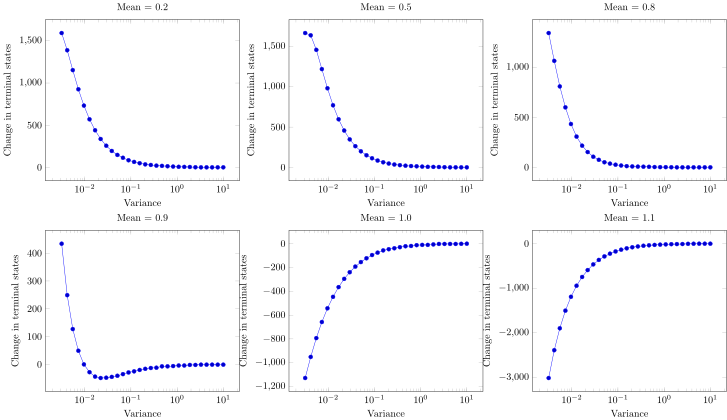

In [34]:
# Calculate minimum beta for termination as a function of alpha without any prior
beta_standard = experience_for_termination(0.0, 1.0)

# Create vector of means and variances
n = 30
means = [0.2, 0.5, 0.8, 0.9, 1.0, 1.1]
vars = logspace(-2.5, 1, n)

# Define group plot
g = GroupPlot(3, 2, groupStyle = "horizontal sep = 1.75cm, vertical sep = 1.75cm")

for m in means
    diffs = zeros(n)
    for i = 1:n
        beta_min = experience_for_termination(m, vars[i])
        diffs[i] = sum(beta_standard - beta_min)
    end

    p = Plots.Linear(vars, diffs)
    a = Axis(p, xlabel="Variance", ylabel="Change in terminal states", title="Mean = $(m)", xmode="log")
    push!(g, a)
end
g

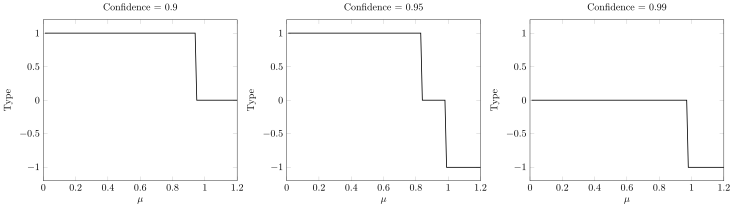

In [55]:
means = collect(0.01:0.01:1.2)
signs = zeros(length(means))
vars = logspace(-4, 1, 30)
confs = [0.9, 0.95, 0.99]

# Define threshold
thresh = 2

# Define group plot
g = GroupPlot(3, 1, groupStyle = "horizontal sep = 1.75cm, vertical sep = 1.75cm")

for c in confs
    for (i, m) in enumerate(means)
        diffs = zeros(n)
        for (j, v) in enumerate(vars)
            beta_min = experience_for_termination(m, v, c)
            diffs[j] = sum(beta_standard - beta_min)
        end
        if (maximum(diffs) > thresh) && (minimum(diffs) > -thresh)
            signs[i] = 1
        elseif (maximum(diffs) > thresh) && (minimum(diffs) < -thresh)
            signs[i] = 0
        else
            signs[i] = -1
        end
    end
    p = Plots.Linear(means, signs, mark="none", style="black, thick")
    a = Axis(p, xlabel=L"\mu", ylabel="Type", title="Confidence = $c", ymin=-1.2, ymax=1.2, xmin=0, xmax=1.2)
    push!(g, a)
end
g

In [118]:
function maximum_lambda(rho::Float64, gamma::Float64, probs::Vector{Float64}, mu::Float64, var::Float64)
    πs = policies_corr[[rho,gamma,probs, var, mu]]

    # Create figure
    g = GroupPlot(3, 3, groupStyle = "horizontal sep = 1.75cm, vertical sep = 1.5cm")

    # Plot probability distribution
    x = [-1, 0, 1, 2]
    p = Plots.Linear(x, probs, style="ybar,black,fill=blue,opacity=0.7", mark="none")
    a = Axis(p, xlabel=L"\Delta \beta", ylabel=L"P(\Delta \beta)", style="xtick={-1,0,1,2}, bar width=27pt",ymin=0)
    push!(g, a)

    # Find MLE of lambda
    released = 1.0*(πs .!= 0.0)
    lambda = zeros(50, 50)
    for i = 1:50
        for j = 1:50
            lambda[i, j] = i/j
        end
    end
    

    # Plot lambda_max
    for i = 1:5
        # Indicator for whether vehicles were released
        βs = collect(1:50)
        λ_max = squeeze(maximum(released[i, :, :].*lambda, 1), 1)
        λ_min = squeeze(minimum((500*released[i, :, :]+1.0).*lambda, 1), 1)

        p1 = Plots.Linear(βs, λ_max)
        p2 = Plots.Linear(βs, λ_min)
        a = Axis(p1, xlabel=L"\beta", ylabel=L"$\hat \lambda_{\max}$", title="t = $(i)", xmin=0)
        push!(g, a)
    end
    g
end

maximum_lambda (generic function with 2 methods)

Interact.Options{:SelectionSlider,Float64}(515: "input-216" = 1.0 Float64 ,"γ",1.0,"1.0",Interact.OptionDict(DataStructures.OrderedDict("1.0"=>1.0),Dict(1.0=>"1.0")),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Float64}(517: "input-217" = 0.95 Float64 ,"ρ",0.95,"0.95",Interact.OptionDict(DataStructures.OrderedDict("0.95"=>0.95),Dict(0.95=>"0.95")),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Int64}(519: "input-218" = 1 Int64 ,"i",1,"1",Interact.OptionDict(DataStructures.OrderedDict("1"=>1),Dict(1=>"1")),Any[],Any[],true,"horizontal")

Interact.Options{:ToggleButtons,Float64}(521: "input-219" = 0.1 Float64 ,"var",0.1,"0.1",Interact.OptionDict(DataStructures.OrderedDict("0.1"=>0.1),Dict(0.1=>"0.1")),Any[],Any[],true,"horizontal")

Interact.Options{:ToggleButtons,Float64}(523: "input-220" = 0.0 Float64 ,"μ",0.0,"0.0",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.5"=>0.5),Dict(0.0=>"0.0",0.5=>"0.5")),Any[],Any[],true,"horizontal")

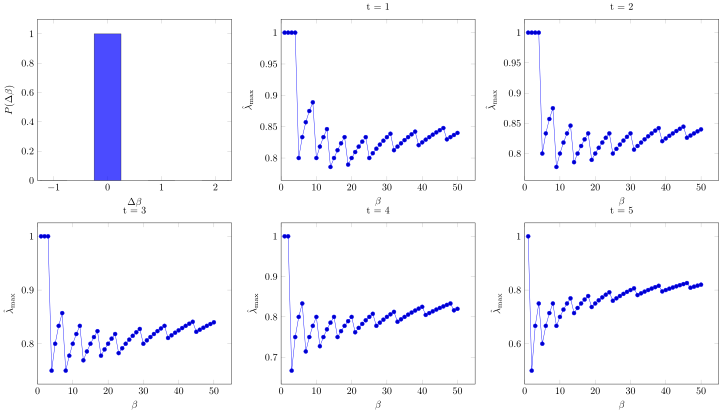

In [147]:
@manipulate for γ=0.5:0.25:1.0, ρ=0.75:0.1:0.95, i = 1:length(probs_array_corr), var=[0.1, 1.0], μ = [0.0, 0.5, 1.0]  
    maximum_lambda(ρ, γ, probs_array_corr[i], μ, var)
end

In [151]:
function visualize_discount(rho::Float64, probs::Vector{Float64}, mu::Float64, var::Float64)
    # Create figure
    group = GroupPlot(3, 3, groupStyle = "horizontal sep = 1.75cm, vertical sep = 1.5cm")
    gammas = [0.5, 0.75, 1.0]

    # Plot probability distribution
    x = [-1, 0, 1, 2]
    p = Plots.Linear(x, probs, style="ybar,black,fill=blue,opacity=0.7", mark="none")
    a = Axis(p, xlabel=L"\Delta \beta", ylabel=L"P(\Delta \beta)", style="xtick={-1,0,1,2}, bar width=27pt",ymin=0)
    push!(group, a)
    
    frac_testing = zeros(5, 3)
    avg_testing = zeros(5, 3)

    # Plot lambda_max
    for (n, g) in enumerate(gammas)
        πs = policies_corr[[rho, g, probs, var, mu]]
        for i = 1:5
            # Find fraction of states where testing occurs
            num_testing = sum(πs[i, :, :] .> 0.0)
            frac_testing[i, n] = num_testing/sum(πs[i, :, :] .>= 0.0)
            avg_testing[i, n] = sum(πs[i, :, :] .* (πs[i, :, :] .> 0.0))/num_testing
        end
    end
    for i = 1:5
        p1 = Plots.Linear(gammas, frac_testing[i, :]./frac_testing[i, 1], legendentry="Frac. tests")
        p2 = Plots.Linear(gammas, avg_testing[i, :]./avg_testing[i, 1], legendentry="Avg. tests")
        a = Axis([p1, p2], xlabel=L"\gamma", ylabel="Value", title="t = $(i)", xmin=0.49)
        push!(group, a)
    end
    group
end

visualize_discount (generic function with 1 method)

In [152]:
@manipulate for ρ=0.75:0.1:0.95, i = 1:length(probs_array_corr), var=[0.1, 1.0], μ = [0.0, 0.5, 1.0]  
    visualize_discount(ρ, probs_array_corr[i], μ, var)
end

Interact.Options{:SelectionSlider,Float64}(553: "input-234" = 0.95 Float64 ,"ρ",0.95,"0.95",Interact.OptionDict(DataStructures.OrderedDict("0.95"=>0.95),Dict(0.95=>"0.95")),Any[],Any[],true,"horizontal")

Interact.Options{:SelectionSlider,Int64}(555: "input-235" = 1 Int64 ,"i",1,"1",Interact.OptionDict(DataStructures.OrderedDict("1"=>1),Dict(1=>"1")),Any[],Any[],true,"horizontal")

Interact.Options{:ToggleButtons,Float64}(557: "input-236" = 0.1 Float64 ,"var",0.1,"0.1",Interact.OptionDict(DataStructures.OrderedDict("0.1"=>0.1),Dict(0.1=>"0.1")),Any[],Any[],true,"horizontal")

Interact.Options{:ToggleButtons,Float64}(559: "input-237" = 0.0 Float64 ,"μ",0.0,"0.0",Interact.OptionDict(DataStructures.OrderedDict("0.0"=>0.0,"0.5"=>0.5),Dict(0.0=>"0.0",0.5=>"0.5")),Any[],Any[],true,"horizontal")

LoadError: KeyError: key Any[0.95,0.5,[0.0,1.0,0.0,0.0],0.1,0.0] not found